In [1]:
import numpy as np
import pandas as pd
import pickle
import sys
import os

sys.path.append((os.path.dirname(os.path.realpath('../lhs'))))
sys.path.append((os.path.dirname(os.path.realpath('../spatial_plot'))))

import lhs
import spatial_plot
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('../../emit_data')
print(df.shape)
df.head()

(22886, 13)


elev med    zen  slope  wv range  wv med  total cloud fraction        lat  \
0      3.22  36.97   7.65      4.78    1.52                  0.10  90.483704   
1      2.23  36.66   3.77      0.66    1.79                  0.02  91.182553   
2      2.06  36.37   1.51      0.40    1.71                  0.03  91.891301   
3      2.08  36.08   2.58      1.04    1.64                  0.03  92.610548   
4      2.31  35.81  14.88      4.74    1.81                  0.00  93.339586   

         lon                              fid      date    time  orbit scene  
0  37.149964  emit20220810t034648_o22203_s001  20220810  034648  22203   001  
1  37.631332  emit20220810t034700_o22203_s001  20220810  034700  22203   001  
2  38.106329  emit20220810t034712_o22203_s001  20220810  034712  22203   001  
3  38.577816  emit20220810t034724_o22203_s001  20220810  034724  22203   001  
4  39.044287  emit20220810t034735_o22203_s001  20220810  034735  22203   001

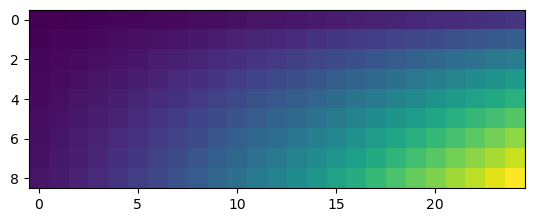

In [16]:
num_samples = range(1, 5)
num_bins = range(6, 16)

sample_size_grid = np.zeros((len(num_samples), len(num_bins)))
theoretical_vals = np.zeros((num_samples[-1]+1, num_bins[-1]+1))

for bin in num_bins:
    for sample in num_samples:
        sample_size_grid[sample-num_samples[0]][bin-num_bins[0]] = len(lhs.LatinHypercubeSample_wvr_sza(df, bin, sample))
        theoretical_vals[sample-num_samples[0]][bin-num_bins[0]] = (bin-1)s**2 * (samples)

plt.imshow(sample_size_grid)

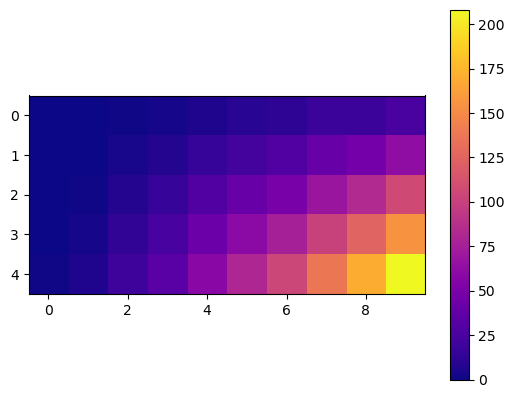

In [14]:
num_samples = np.arange(6)
num_bins = np.arange(16)

sample_size_grid = np.zeros((len(num_samples), len(num_bins)))
theoretical_vals = np.zeros((len(num_samples), len(num_bins)))

for bin in num_bins:
    for sample in num_samples:
        sample_size_grid[sample][bin] = len(lhs.LatinHypercubeSample_wvr_sza(df, bin, sample))
        theoretical_vals[sample][bin] = (bin-1)**2 * (sample)
        
residuals = np.subtract(theoretical_vals, sample_size_grid)[1:,6:]

plt.imshow(residuals, cmap = 'plasma')
plt.colorbar()

In [15]:
residuals

array([[  0.,   0.,   1.,   3.,   6.,  10.,  12.,  18.,  18.,  25.],
       [  0.,   0.,   4.,   8.,  16.,  23.,  29.,  41.,  47.,  62.],
       [  0.,   1.,   8.,  16.,  29.,  40.,  50.,  69.,  83., 107.],
       [  0.,   3.,  13.,  24.,  43.,  60.,  76., 101., 125., 155.],
       [  1.,   6.,  19.,  33.,  59.,  81., 104., 137., 170., 208.]])

In [12]:
theoretical_vals

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  1.,   0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81.,
        100., 121., 144., 169., 196.],
       [  2.,   0.,   2.,   8.,  18.,  32.,  50.,  72.,  98., 128., 162.,
        200., 242., 288., 338., 392.],
       [  3.,   0.,   3.,  12.,  27.,  48.,  75., 108., 147., 192., 243.,
        300., 363., 432., 507., 588.],
       [  4.,   0.,   4.,  16.,  36.,  64., 100., 144., 196., 256., 324.,
        400., 484., 576., 676., 784.],
       [  5.,   0.,   5.,  20.,  45.,  80., 125., 180., 245., 320., 405.,
        500., 605., 720., 845., 980.]])

In [13]:
sample_size_grid

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   4.,   9.,  16.,  25.,  36.,  48.,  61.,  75.,
         90., 109., 126., 151., 171.],
       [  0.,   0.,   2.,   8.,  18.,  32.,  50.,  72.,  94., 120., 146.,
        177., 213., 247., 291., 330.],
       [  0.,   0.,   3.,  12.,  27.,  48.,  75., 107., 139., 176., 214.,
        260., 313., 363., 424., 481.],
       [  0.,   0.,   4.,  16.,  36.,  64., 100., 141., 183., 232., 281.,
        340., 408., 475., 551., 629.],
       [  0.,   0.,   5.,  20.,  45.,  80., 124., 174., 226., 287., 346.,
        419., 501., 583., 675., 772.]])

(330, 13)


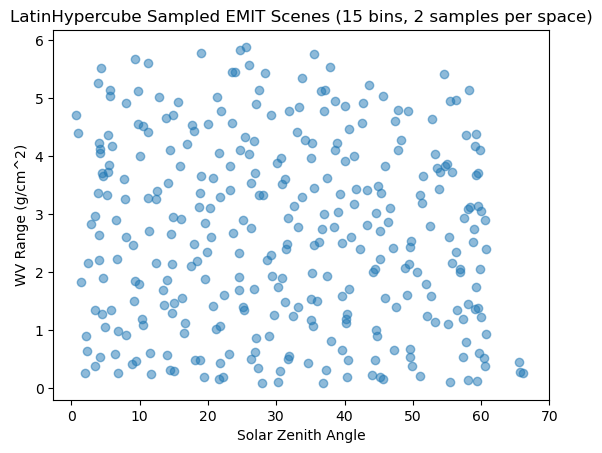

In [36]:
bins = 15
samples = 2
sample_run = lhs.LatinHypercubeSample_wvr_sza(df, bins, samples)

lhs_samples = df.iloc[sample_run]
print(lhs_samples.shape)
plt.scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.5)
plt.xlabel('Solar Zenith Angle')
plt.xticks(np.arange(0,80,10))
plt.ylabel('WV Range (g/cm^2)')
plt.title(f'LatinHypercube Sampled EMIT Scenes ({bins-1} bins, {samples} samples per space)' );

(620, 13)


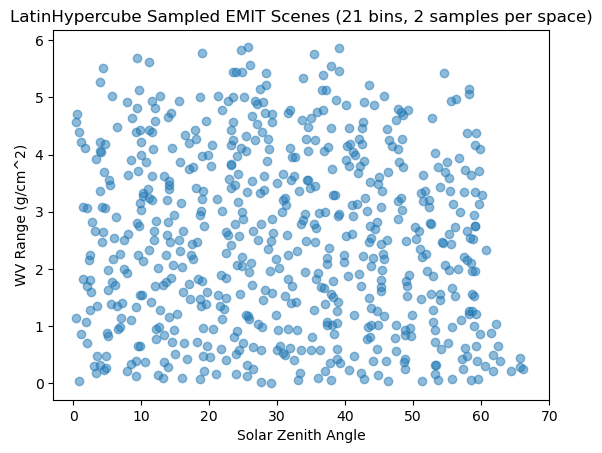

In [37]:
bins = 21
samples = 2
sample_run = lhs.LatinHypercubeSample_wvr_sza(df, bins, samples)

lhs_samples = df.iloc[sample_run]
print(lhs_samples.shape)
plt.scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.5)
plt.xlabel('Solar Zenith Angle')
plt.xticks(np.arange(0,80,10))
plt.ylabel('WV Range (g/cm^2)')
plt.title(f'LatinHypercube Sampled EMIT Scenes ({bins-1} bins, {samples} samples per space)' );

(1285, 13)


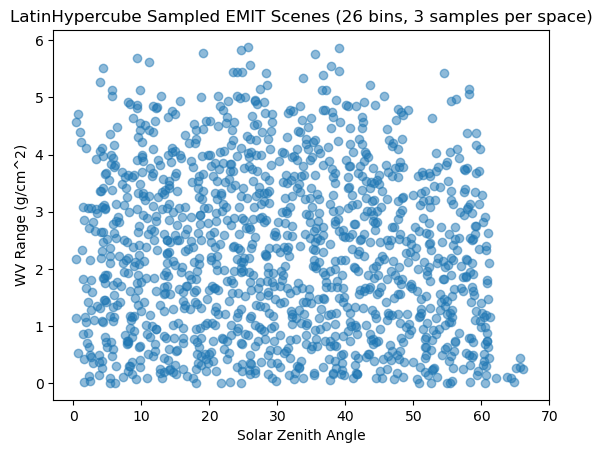

In [38]:
bins = 26
samples = 3
sample_run = lhs.LatinHypercubeSample_wvr_sza(df, bins, samples)

lhs_samples = df.iloc[sample_run]
print(lhs_samples.shape)
plt.scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.5)
plt.xlabel('Solar Zenith Angle')
plt.xticks(np.arange(0,80,10))
plt.ylabel('WV Range (g/cm^2)')
plt.title(f'LatinHypercube Sampled EMIT Scenes ({bins-1} bins, {samples} samples per space)' );

(2173, 13)


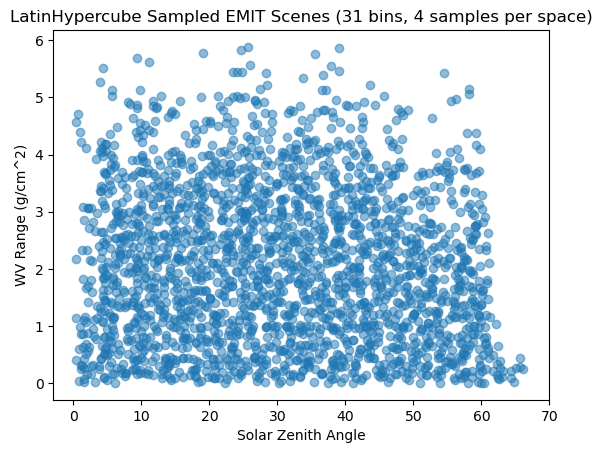

In [39]:
bins = 31
samples = 4
sample_run = lhs.LatinHypercubeSample_wvr_sza(df, bins, samples)

lhs_samples = df.iloc[sample_run]
print(lhs_samples.shape)
plt.scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.5)
plt.xlabel('Solar Zenith Angle')
plt.xticks(np.arange(0,80,10))
plt.ylabel('WV Range (g/cm^2)')
plt.title(f'LatinHypercube Sampled EMIT Scenes ({bins-1} bins, {samples} samples per space)' );

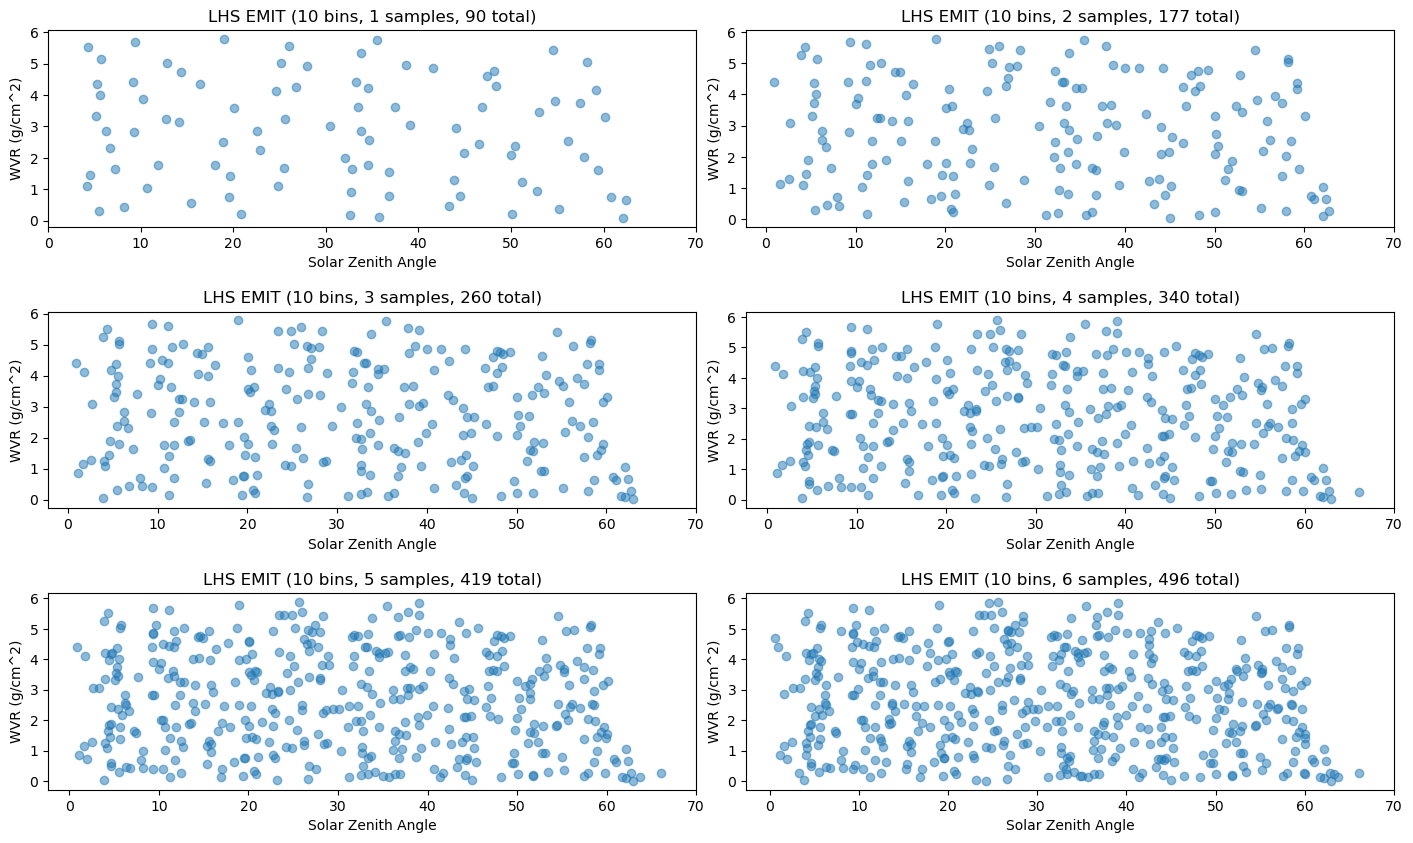

In [56]:
samples_per_space = [1, 2, 3, 4, 5, 6]
bins = 11

fig, axs = plt.subplots(3, 2, figsize = (14, 8))
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=4.0)


row = 0
col = 0

for i in range(len(samples_per_space)):

    if col == 2:
        col = 0
        row+=1
    
    samples = samples_per_space[i]
    sample_run = lhs.LatinHypercubeSample_wvr_sza(df, bins, samples)
    
    lhs_samples = df.iloc[sample_run]
    
    #print(lhs_samples.shape)
    axs[row, col].scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.5)
    axs[row, col].set_xlabel('Solar Zenith Angle')
    axs[row, col].set_xticks(np.arange(0,80,10))
    axs[row, col].set_ylabel('WVR (g/cm^2)')
    axs[row, col].set_title(f'LHS EMIT ({bins-1} bins, {samples} samples, {lhs_samples.shape[0]} total)' );

    col+=1

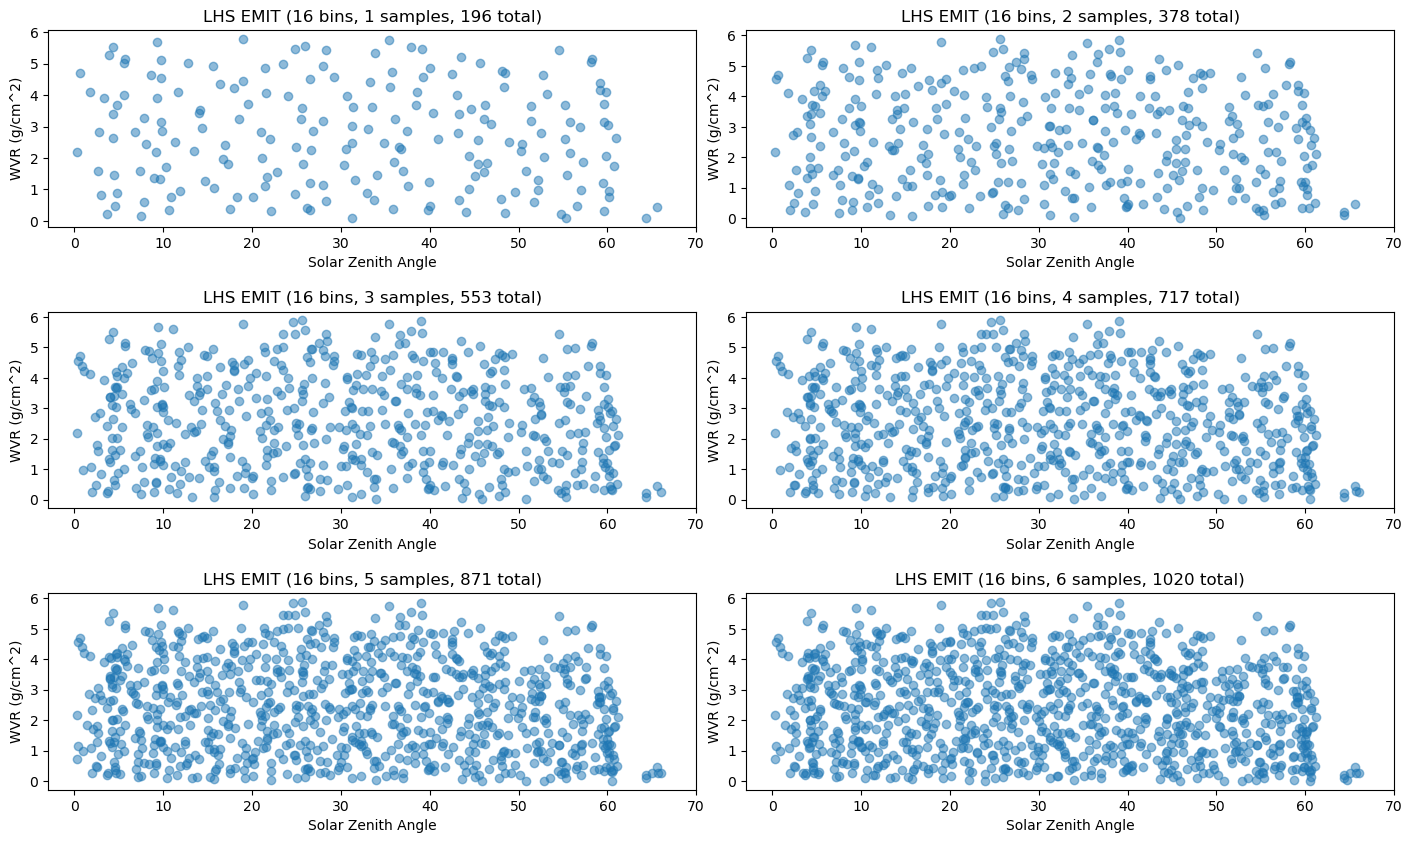

In [57]:
samples_per_space = [1, 2, 3, 4, 5, 6]
bins = 16

fig, axs = plt.subplots(3, 2, figsize = (14, 8))
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=4.0)


row = 0
col = 0

for i in range(len(samples_per_space)):

    if col == 2:
        col = 0
        row+=1
    
    samples = samples_per_space[i]
    sample_run = lhs.LatinHypercubeSample_wvr_sza(df, bins, samples)
    
    lhs_samples = df.iloc[sample_run]
    
    #print(lhs_samples.shape)
    axs[row, col].scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.5)
    axs[row, col].set_xlabel('Solar Zenith Angle')
    axs[row, col].set_xticks(np.arange(0,80,10))
    axs[row, col].set_ylabel('WVR (g/cm^2)')
    axs[row, col].set_title(f'LHS EMIT ({bins} bins, {samples} samples, {lhs_samples.shape[0]} total)' );

    col+=1

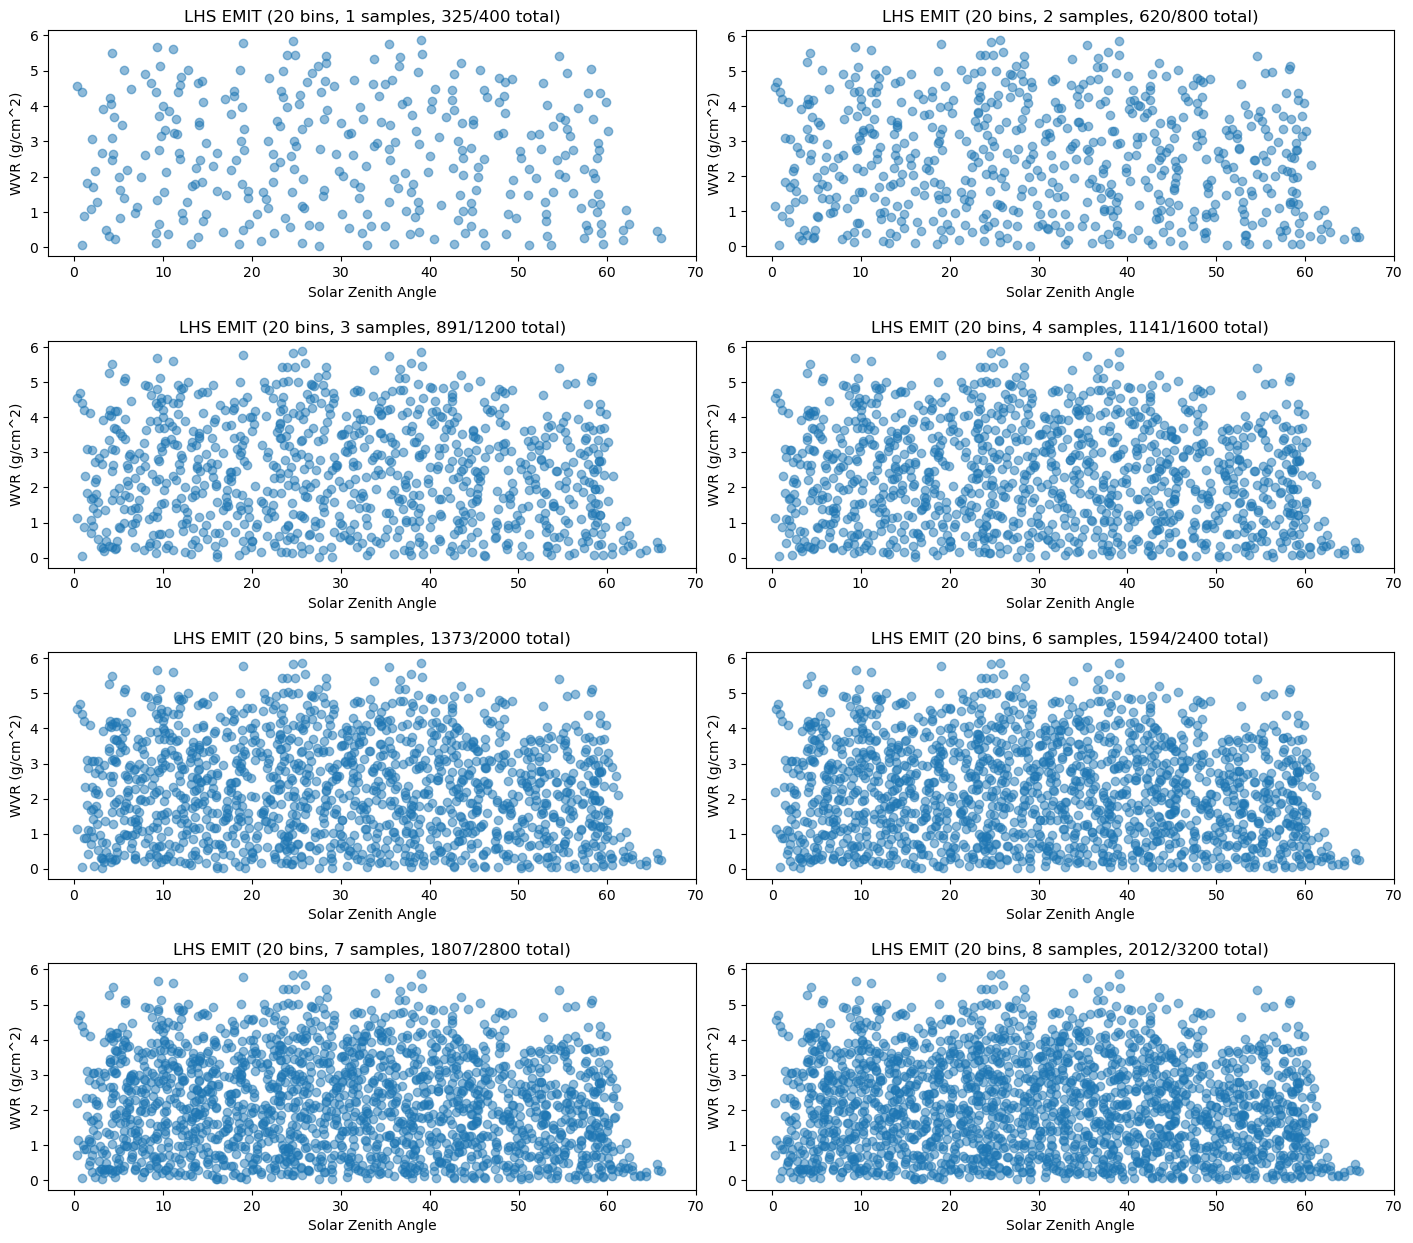

In [63]:
samples_per_space = [1, 2, 3, 4, 5, 6, 7, 8]
bins = 21

fig, axs = plt.subplots(4, 2, figsize = (14, 12))
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=4.0)


row = 0
col = 0

for i in range(len(samples_per_space)):

    if col == 2:
        col = 0
        row+=1
    
    samples = samples_per_space[i]
    sample_run = lhs.LatinHypercubeSample_wvr_sza(df, bins, samples)
    
    lhs_samples = df.iloc[sample_run]
    
    #print(lhs_samples.shape)
    axs[row, col].scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.5)
    axs[row, col].set_xlabel('Solar Zenith Angle')
    axs[row, col].set_xticks(np.arange(0,80,10))
    axs[row, col].set_ylabel('WVR (g/cm^2)')
    axs[row, col].set_title(f'LHS EMIT ({bins-1} bins, {samples} samples, {lhs_samples.shape[0]}/{(bins-1)**2 * (samples)} total)' );

    col+=1

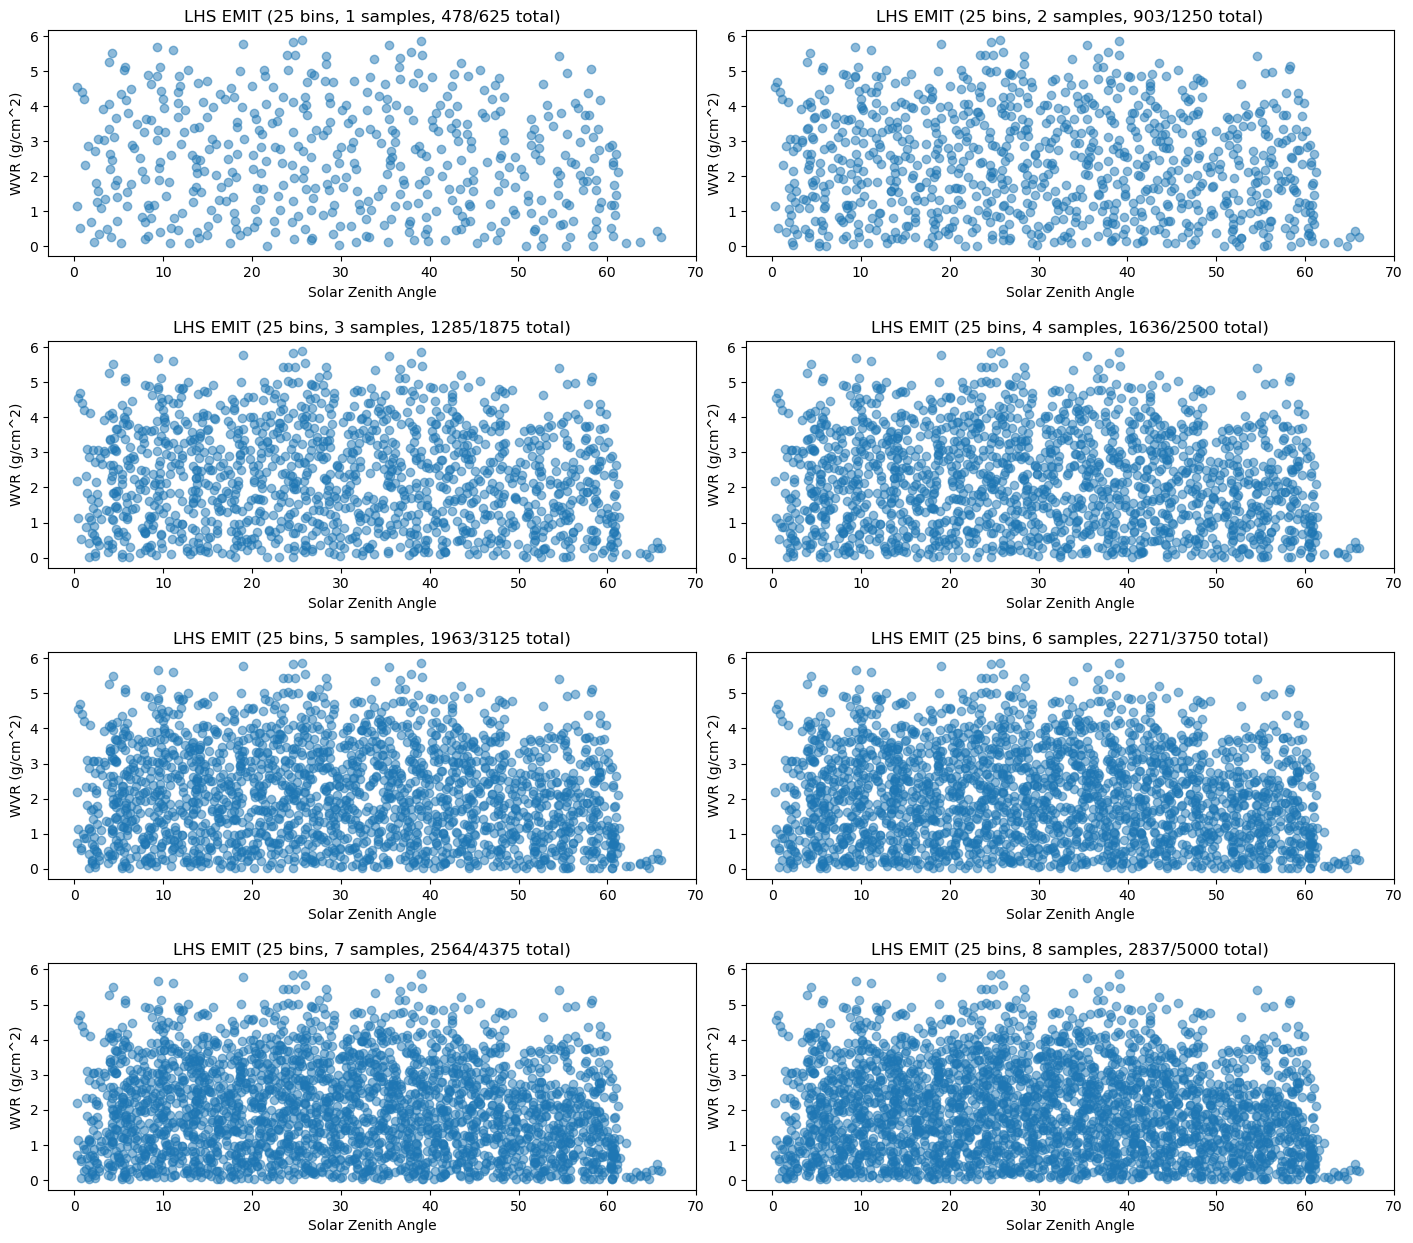

In [62]:
samples_per_space = [1, 2, 3, 4, 5, 6, 7, 8]
bins = 26

fig, axs = plt.subplots(4, 2, figsize = (14, 12))
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=4.0)


row = 0
col = 0

for i in range(len(samples_per_space)):

    if col == 2:
        col = 0
        row+=1
    
    samples = samples_per_space[i]
    sample_run = lhs.LatinHypercubeSample_wvr_sza(df, bins, samples)
    
    lhs_samples = df.iloc[sample_run]
    
    #print(lhs_samples.shape)
    axs[row, col].scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.5)
    axs[row, col].set_xlabel('Solar Zenith Angle')
    axs[row, col].set_xticks(np.arange(0,80,10))
    axs[row, col].set_ylabel('WVR (g/cm^2)')
    axs[row, col].set_title(f'LHS EMIT ({bins-1} bins, {samples} samples, {lhs_samples.shape[0]}/{(bins-1)**2 * (samples)} total)' );

    col+=1

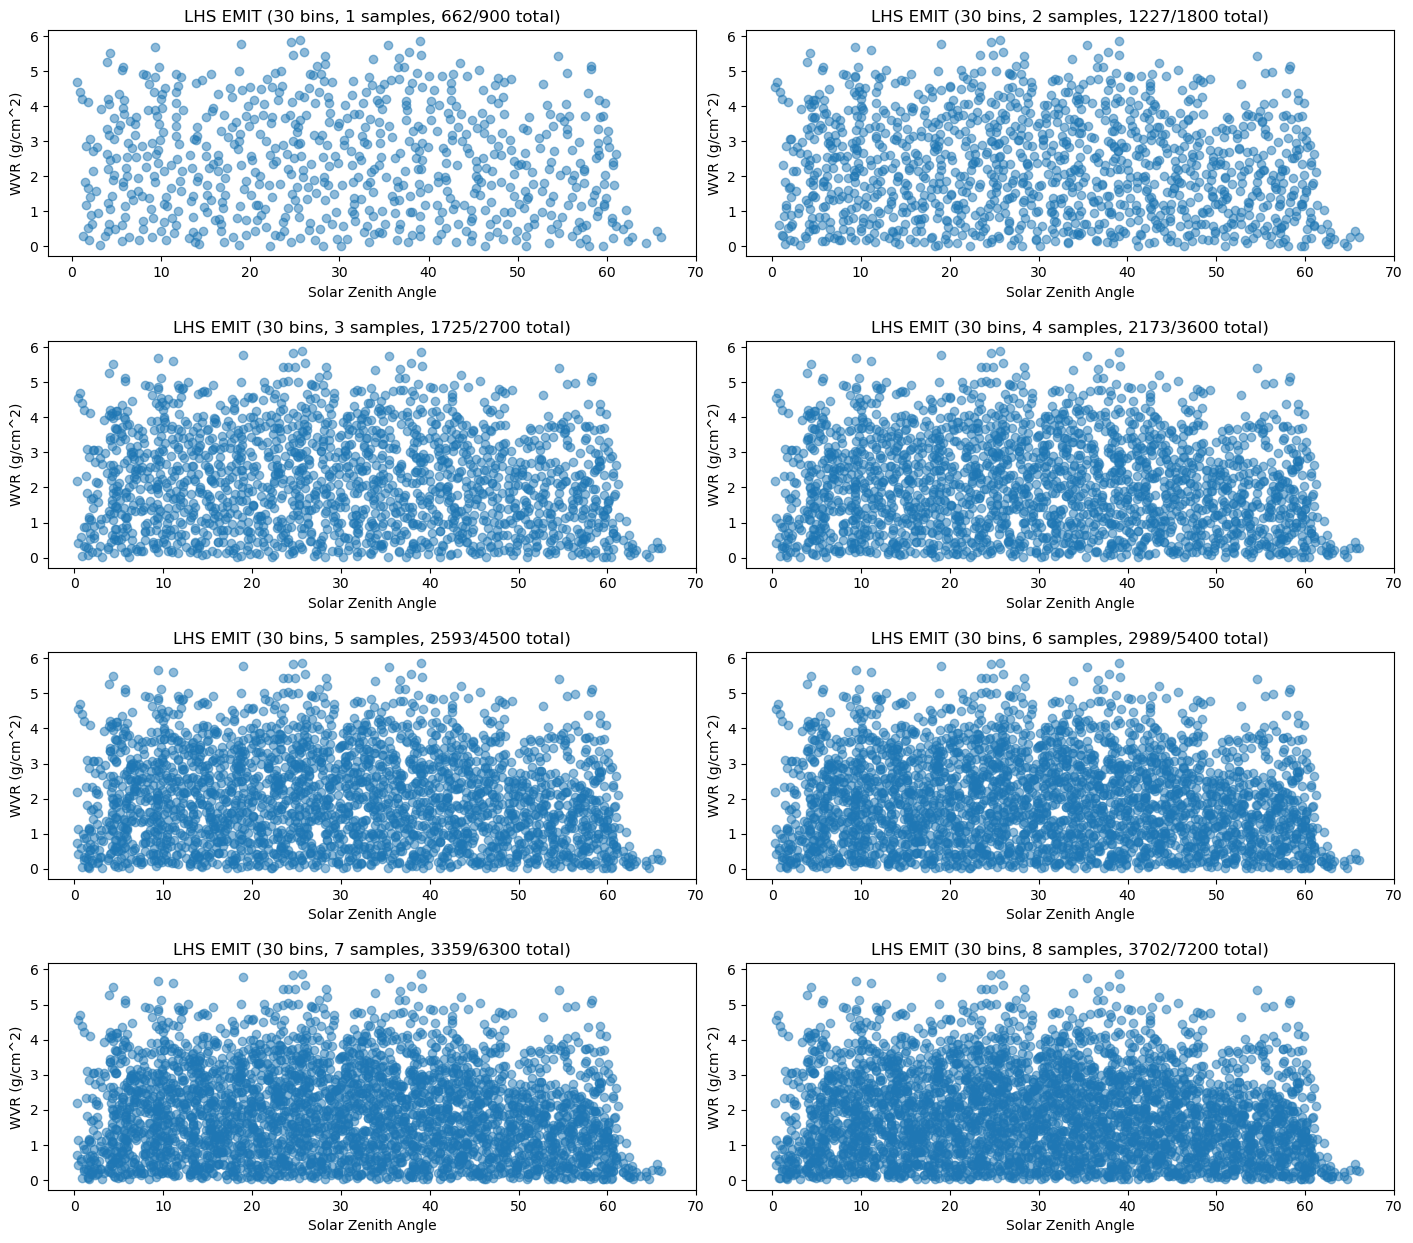

In [64]:
samples_per_space = [1, 2, 3, 4, 5, 6, 7, 8]
bins = 31

fig, axs = plt.subplots(4, 2, figsize = (14, 12))
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=4.0)


row = 0
col = 0

for i in range(len(samples_per_space)):

    if col == 2:
        col = 0
        row+=1
    
    samples = samples_per_space[i]
    sample_run = lhs.LatinHypercubeSample_wvr_sza(df, bins, samples)
    
    lhs_samples = df.iloc[sample_run]
    
    #print(lhs_samples.shape)
    axs[row, col].scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.5)
    axs[row, col].set_xlabel('Solar Zenith Angle')
    axs[row, col].set_xticks(np.arange(0,80,10))
    axs[row, col].set_ylabel('WVR (g/cm^2)')
    axs[row, col].set_title(f'LHS EMIT ({bins-1} bins, {samples} samples, {lhs_samples.shape[0]}/{(bins-1)**2 * (samples)} total)' );

    col+=1

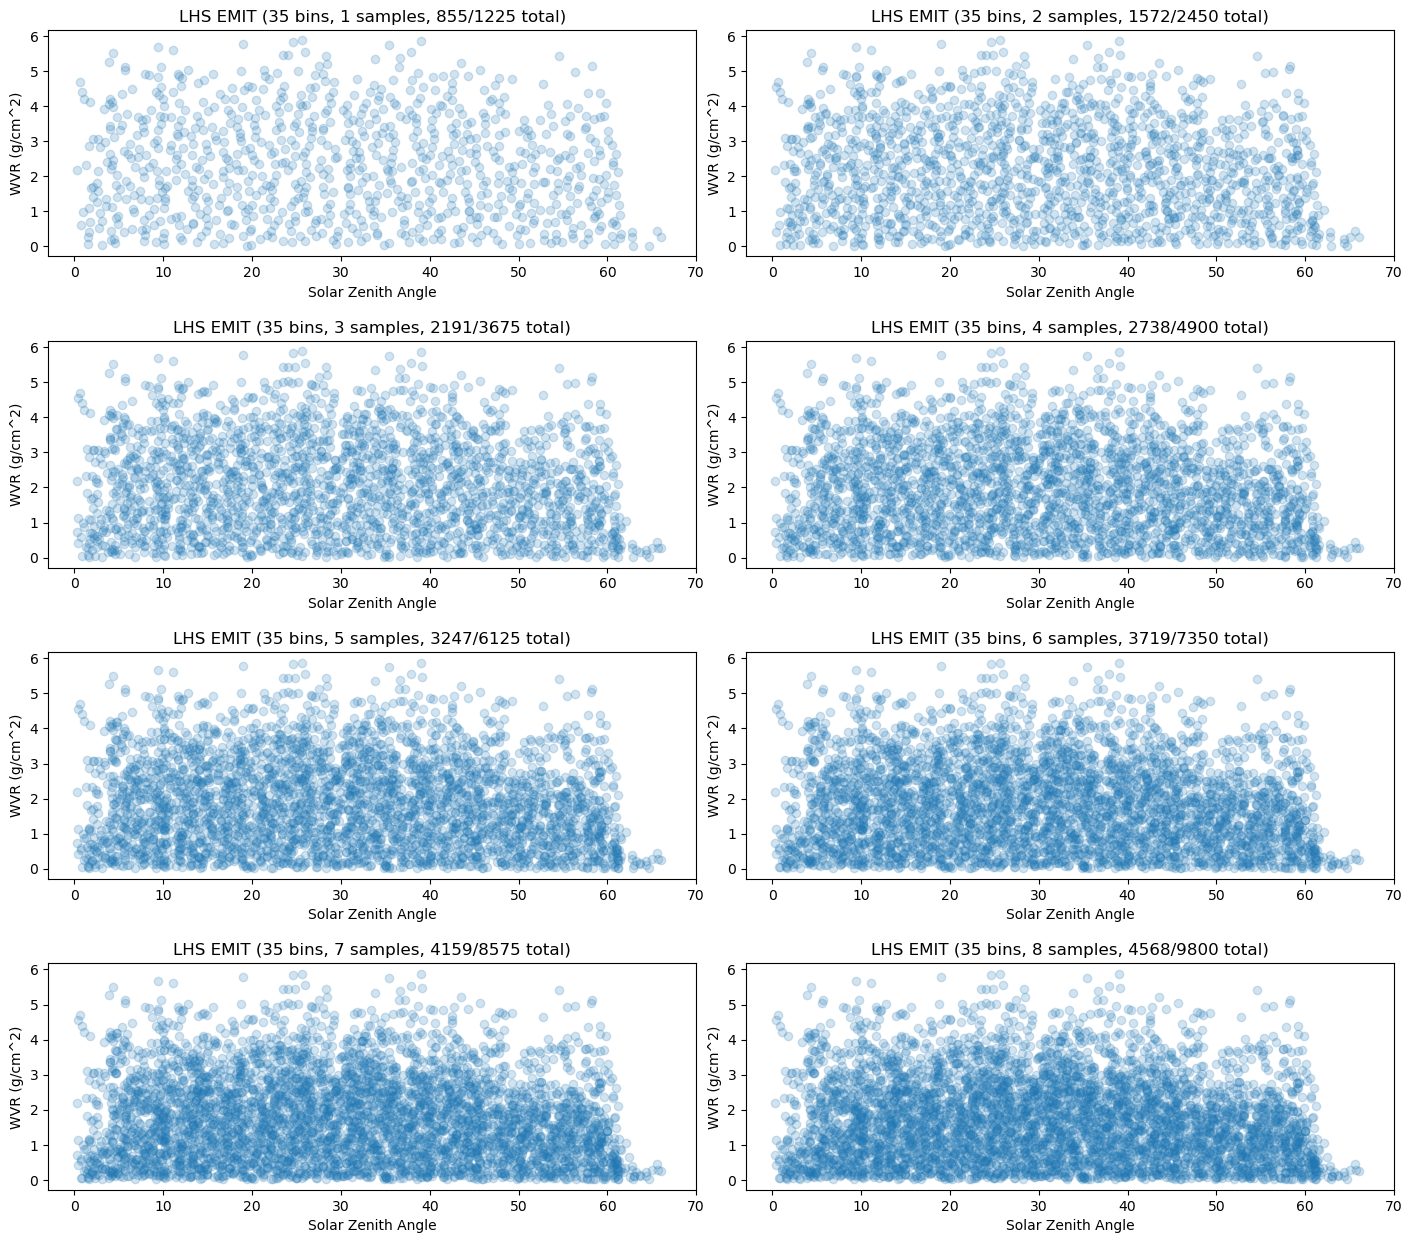

In [66]:
samples_per_space = [1, 2, 3, 4, 5, 6, 7, 8]
bins = 36

fig, axs = plt.subplots(4, 2, figsize = (14, 12))
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=4.0)


row = 0
col = 0

for i in range(len(samples_per_space)):

    if col == 2:
        col = 0
        row+=1
    
    samples = samples_per_space[i]
    sample_run = lhs.LatinHypercubeSample_wvr_sza(df, bins, samples)
    
    lhs_samples = df.iloc[sample_run]
    
    #print(lhs_samples.shape)
    axs[row, col].scatter(lhs_samples['zen'], lhs_samples['wv range'], alpha = 0.2)
    axs[row, col].set_xlabel('Solar Zenith Angle')
    axs[row, col].set_xticks(np.arange(0,80,10))
    axs[row, col].set_ylabel('WVR (g/cm^2)')
    axs[row, col].set_title(f'LHS EMIT ({bins-1} bins, {samples} samples, {lhs_samples.shape[0]}/{(bins-1)**2 * (samples)} total)' );

    col+=1